In [177]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


## 任务2.1

In [178]:
data = pd.read_excel('./data.xlsx')
data.head()

,iID,iPID,uFILE_FLAG,sARCH_ID,sFLOW_NAME,sNODE_NAME,iNODE_STATUS,iUSER_ID,iWF_ID,iWN_ID,...,iFLOW_NODE_NO,iPROC_USERID,sPIC_SERVER_PATH,sPDF_SERVER_PATH,iARCH_TYPE,sORDER_ARCH_ID,dUPDATE_TIME,dNODE_TIME,dPROC_TIME,sBatch_number
0,725975,186250,0B71F6DD-E7EC-4FB2-87C4-EB576B70F4C2,托644031-册一,不动产工作流,扫描,2,68,20,12,...,1,NaN,\\127.0.0.1\tlscan\tlscanfile,\\192.168.1.253\tlscan\tlscanpdf,91,托00644031-册001,2020-07-01 09:17:22.313,2020-07-01 09:21:10,NaT,902
1,725976,186251,7B0B1758-12F7-4A44-91F9-96C5B9B2E6FD,托644032-册一,不动产工作流,扫描,2,68,20,12,...,1,NaN,\\127.0.0.1\tlscan\tlscanfile,\\192.168.1.253\tlscan\tlscanpdf,91,托00644032-册001,2020-07-01 09:17:42.867,2020-07-01 09:21:17,NaT,902
2,725249,185781,94CC72C0-A6B4-4627-868E-EE3B423877C7,托7181-册一,不动产工作流,扫描,2,44,20,12,...,1,NaN,\\127.0.0.1\tlscan\tlscanfile,\\192.168.1.253\tlscan\tlscanpdf,91,托00007181-册001,2020-07-01 08:39:08.370,2020-07-01 09:26:29,NaT,604
3,725250,185782,FA6E9CC1-5579-41D5-918B-6B9F0D3B2486,托7182-册一,不动产工作流,扫描,2,44,20,12,...,1,NaN,\\127.0.0.1\tlscan\tlscanfile,\\192.168.1.253\tlscan\tlscanpdf,91,托00007182-册001,2020-07-01 08:39:08.397,2020-07-01 09:26:36,NaT,604
4,725251,185783,01016875-EA2C-43BE-9637-CD649F21E58A,托7183-册一,不动产工作流,扫描,2,44,20,12,...,1,NaN,\\127.0.0.1\tlscan\tlscanfile,\\192.168.1.253\tlscan\tlscanpdf,91,托00007183-册001,2020-07-01 08:39:08.420,2020-07-01 09:26:42,NaT,604


In [179]:
fin = data[(data['iNODE_STATUS'] == 2) | (data['iNODE_STATUS'] == 5)]
fin_drop_index = fin[fin['dNODE_TIME'].isna()].index
fin = fin.drop(fin_drop_index).reset_index(drop=True)
fin['day'] = fin['dNODE_TIME'].dt.day
fin['num'] = 1
fin_groupped = fin.groupby(['day','iFLOW_NODE_NO'])['num'].sum()

In [180]:
fin_groupped = fin_groupped.unstack()

In [181]:
fin_groupped = fin_groupped.fillna(0)

In [182]:
fin_groupped = fin_groupped.reset_index(drop=False)

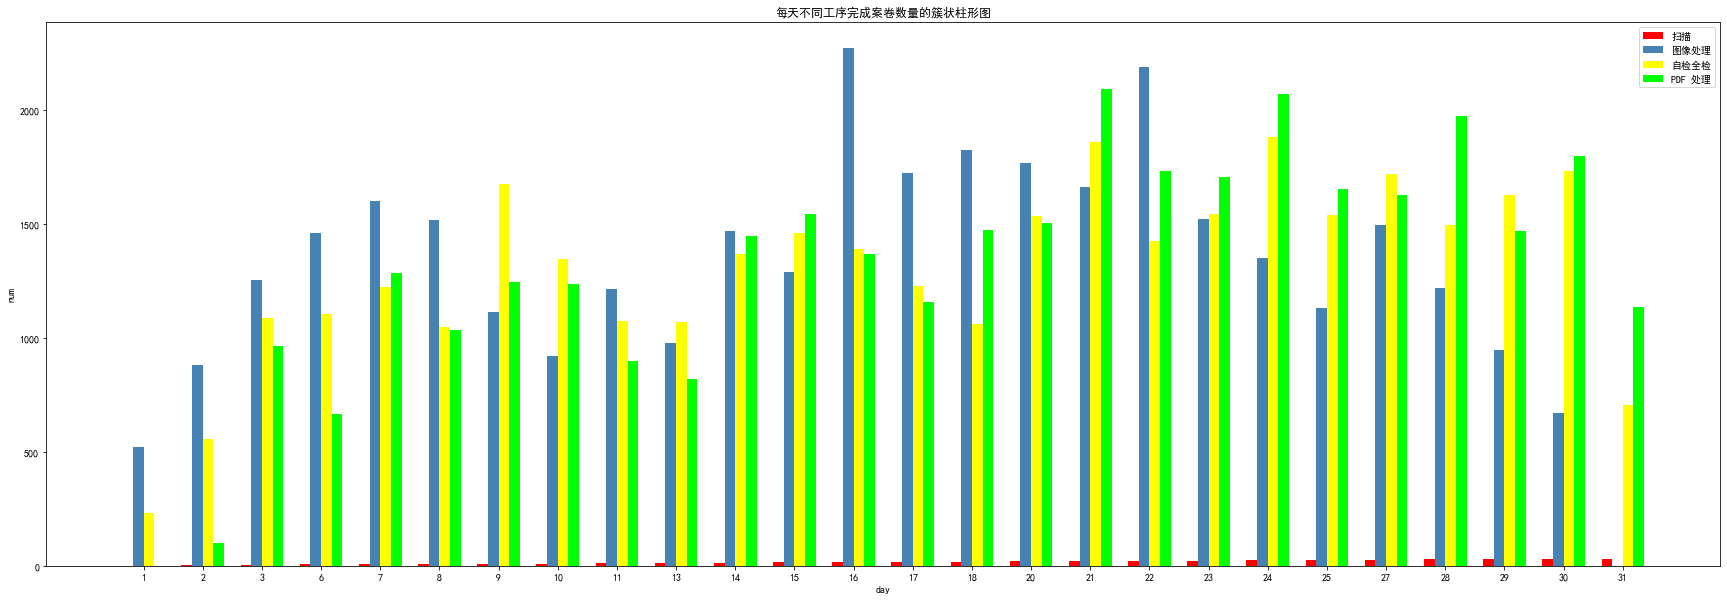

In [183]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(30,10))
w = 0.18
x = list(range(4))
ind_1=np.arange(len(fin_groupped['day']))
ind_2=ind_1 +w
ind_3=ind_1 +2*w
ind_4=ind_1 +3*w

day_list = fin_groupped['day']

plt.bar(ind_1,fin_groupped.iloc[:,0],w,color = 'red',tick_label =day_list,label="扫描")
plt.bar(ind_2,fin_groupped.iloc[:,1],w,color = 'steelblue',tick_label =day_list,label="图像处理")
plt.bar(ind_3,fin_groupped.iloc[:,2],w,color = 'yellow',tick_label =day_list,label="自检全检")
plt.bar(ind_4,fin_groupped.iloc[:,3],w,color = 'lime',tick_label =day_list,label="PDF 处理")                        


plt.title("每天不同工序完成案卷数量的簇状柱形图")
plt.legend(["扫描","图像处理","自检全检","PDF 处理"],labelspacing=1)
plt.ylabel('num')
plt.xlabel('day')
plt.xticks(ind_1 + 3*(w/2), fin_groupped['day'])  # x刻度值居中显示
plt.xlim()
plt.legend()
plt.show()

## 任务2.2

In [184]:
def is_workday(date):
    weekdays = [0, 1, 2, 3, 4,5]  # 周一到周六
    return date.weekday() in weekdays

In [185]:
from datetime import datetime, timedelta

fin['dNODE_TIME'].fillna(0)

data['day'] = data['dNODE_TIME'].dt.day

# 已完成并提交的案卷  
ret = data[(data['iNODE_STATUS'] == 2) | (data['iNODE_STATUS'] == 5)]

# 计算每批的总耗时  
data['total_consume'] = data['dNODE_TIME'] - data['dUPDATE_TIME']

# 计算每批中每个案卷的工作日时间  
data['workday_time'] = data.apply(lambda row: row['total_consume'] if is_workday(row['dUPDATE_TIME'].date()) 
                                  and is_workday(row['dNODE_TIME'].date()) else timedelta(0), axis=1)

# 将工作日时间转换为小时  
data['workday_time_hours'] = data['workday_time'].dt.total_seconds() / 3600

In [192]:
# 根据工序分组计算完成案卷的数量、工作日总耗时和平均耗时  
df_forth = data.groupby(['day','iFLOW_NODE_NO']).agg({'iID': 'count', 'workday_time_hours': 'sum', 'sBatch_number': 'first'})

# 计算平均耗时  
df_forth['avg_time_hours'] = df_forth['workday_time_hours'] / df_forth['iID']
df_forth = df_forth.drop('sBatch_number',axis=1)
df_forth = df_forth.reset_index(drop=False)

# 重命名列名  
df_forth.columns = ['天数','工序', '完成案卷的数量', '总耗时 (h)', '平均耗时 (h/卷)']

# 结果保留3位小数  
df_forth = df_forth.round(3)

In [199]:
df_forth.sort_values('工序', inplace=True)
df_forth.sort_values('天数', inplace=True)

In [241]:
fir = df_forth[df_forth['工序'] == 1]
sec = df_forth[df_forth['工序'] == 2]
thi = df_forth[df_forth['工序'] == 3]
four = df_forth[df_forth['工序'] == 4]

array([ 1.,  2.,  3.,  6.,  7.,  8.,  9., 10., 11., 13., 14., 15., 16.,
       17., 18., 20., 21., 22., 23., 24., 25., 27., 28., 29., 30.])

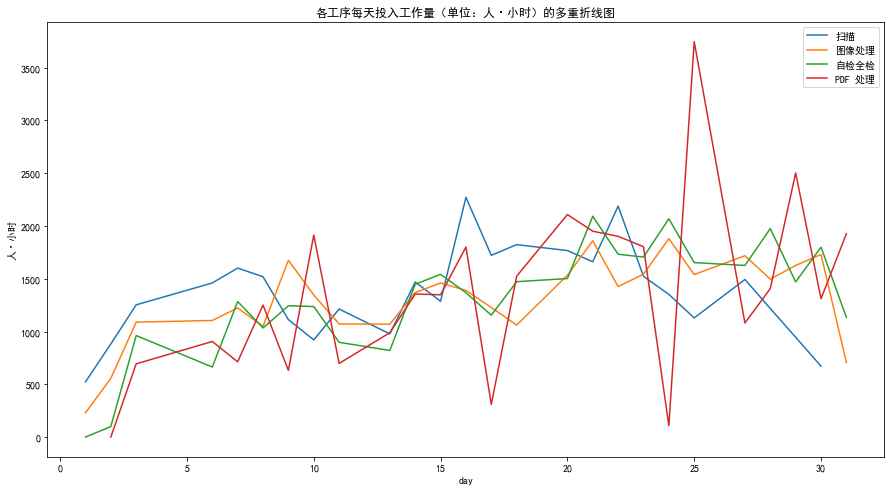

In [252]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(15,8))
day_list = fin_groupped['day']

sns.lineplot(x =fir['天数'].unique(),y = fir['完成案卷的数量'],label="扫描")
sns.lineplot(x=sec['天数'].unique(),y = sec['完成案卷的数量'],label="图像处理")
sns.lineplot(x=thi['天数'].unique(),y = thi['完成案卷的数量'],label="自检全检")
sns.lineplot(x=four['天数'].unique(),y = four['完成案卷的数量'],label="PDF 处理")                        


plt.title("各工序每天投入工作量（单位：人·小时）的多重折线图")
plt.legend(["扫描","图像处理","自检全检","PDF 处理"],labelspacing=1)
plt.ylabel('人·小时')
plt.xlabel('day')
plt.legend()
plt.show()

## 任务2.3

In [375]:
data['num'] = 1
worker_ret = data[data['iNODE_STATUS']==5]
worker_ret_ass = worker_ret[worker_ret['iFLOW_NODE_NO']==3]
worker_ret_ass = worker_ret_ass.groupby(['day','iPROC_USERID'])['num'].sum()
worker_ret_ass =worker_ret_ass.reset_index(drop = False)
ass_list = list(worker_ret_ass['iPROC_USERID'].values)

In [376]:
data['num'] = 1
worker_ret = data[data['iNODE_STATUS']==5]
df_third = worker_ret
worker_ret = data.groupby(['day','iFLOW_NODE_NO'])['num'].sum()
worker_ret = worker_ret.reset_index(drop = False)

# map
map = {1:'扫描',2:'图像处理',3:'自检全检',4:'PDF处理'}

worker_ret['iFLOW_NODE_NO'] = worker_ret['iFLOW_NODE_NO'].map(map)

worker_ret

,day,iFLOW_NODE_NO,num
0,1.0,扫描,523
1,1.0,图像处理,231
2,1.0,自检全检,1
3,2.0,扫描,883
4,2.0,图像处理,557
...,...,...,...
97,30.0,自检全检,1799
98,30.0,PDF处理,1311
99,31.0,图像处理,707
100,31.0,自检全检,1134


In [377]:
worker_ret[worker_ret['day']==1]['iFLOW_NODE_NO'].values
worker_ret[worker_ret['day']==1]['num'].values

array([523, 231,   1], dtype=int64)

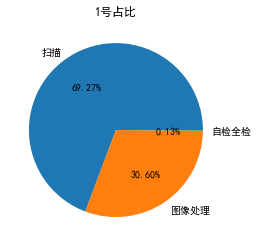

In [378]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
plt.pie(labels=worker_ret[worker_ret['day']==1]['iFLOW_NODE_NO'].values,x=worker_ret[worker_ret['day']==1]['num'].values,autopct='%.2f%%')
plt.title("1号占比")
plt.show()

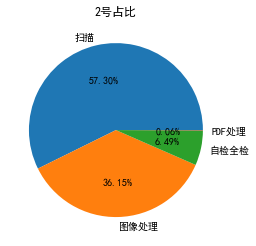

In [379]:
fig = plt.figure(figsize=(10,8))
plt.pie(labels=worker_ret[worker_ret['day']==2]['iFLOW_NODE_NO'].values,x=worker_ret[worker_ret['day']==2]['num'].values,autopct='%.2f%%')
plt.title("2号占比")
plt.show()

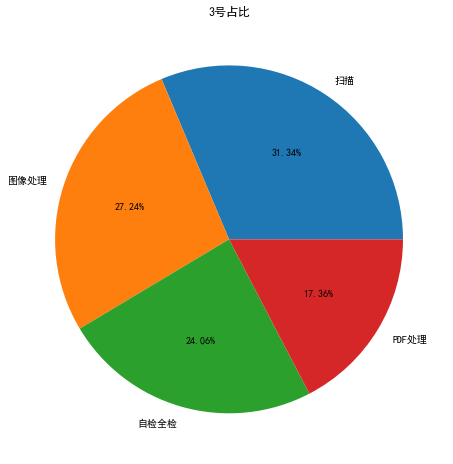

In [380]:
fig = plt.figure(figsize=(10,8))
plt.pie(labels=worker_ret[worker_ret['day']==3]['iFLOW_NODE_NO'].values,x=worker_ret[worker_ret['day']==3]['num'].values,autopct='%.2f%%')
plt.title("3号占比")
plt.show()

In [381]:
# plt.pie(labels=worker_ret[worker_ret['day']==4]['iFLOW_NODE_NO'].values,x=worker_ret[worker_ret['day']==4]['num'].values,autopct='%.2f%%')

In [382]:
# plt.pie(labels=worker_ret[worker_ret['day']==5]['iFLOW_NODE_NO'].values,x=worker_ret[worker_ret['day']==5]['num'].values,autopct='%.2f%%')

## 任务2.4

In [383]:
worker_ret = data[data['iNODE_STATUS']==5]
worker_ret_ass = worker_ret[worker_ret['iFLOW_NODE_NO']==2]
worker_ret_ass = worker_ret_ass.groupby(['iPROC_USERID'])['num'].sum()
worker_ret_ass =worker_ret_ass.reset_index(drop = False)
ass_list = list(worker_ret_ass['iPROC_USERID'].values)

In [384]:
data['num'] = 1
worker_ret = data[data['iNODE_STATUS']==5]
df_third = worker_ret
worker_ret = data.groupby(['iPROC_USERID'])['num'].sum()
worker_ret = worker_ret.reset_index(drop = False)

In [385]:
df_third = pd.merge(worker_ret, worker_ret_ass, on='iPROC_USERID', how='outer')
df_third = df_third.dropna()

In [389]:
df_third['diff'] = df_third['num_x']-df_third['num_y']
df_third['返工案卷占比 (%)'] = round(df_third['diff']/df_third['num_x'],3)
df_third.sort_values('返工案卷占比 (%)', ascending=False,inplace=True)
df_third = df_third.drop(df_third[df_third['返工案卷占比 (%)']==0].index)
df_third

,iPROC_USERID,num_x,num_y,diff,返工案卷占比 (%)
3,13.0,39,3.0,36.0,0.923
9,42.0,347,59.0,288.0,0.830
0,10.0,109,24.0,85.0,0.780
8,33.0,8,4.0,4.0,0.500
10,44.0,2,1.0,1.0,0.500
17,73.0,82,41.0,41.0,0.500
24,95.0,42,21.0,21.0,0.500


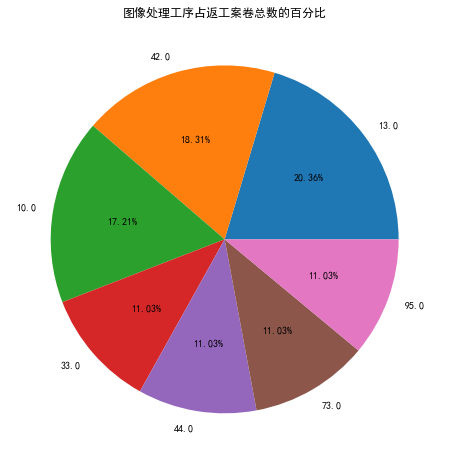

In [392]:
fig = plt.figure(figsize=(10,8))
plt.pie(labels=df_third['iPROC_USERID'],x=df_third['返工案卷占比 (%)'].values,autopct='%.2f%%')
plt.title("图像处理工序占返工案卷总数的百分比")
plt.show()